<a href="https://colab.research.google.com/github/sahug/neetcode/blob/main/Neetcode%20-%20Linked%20List%20-%20Copy%20List%20with%20Random%20Pointer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Neetcode - Linked List - Copy List with Random Pointer**

A linked list of length `n` is given such that each node contains an additional random pointer, which could point to any node in the list, or `null`.

Construct a **deep copy** of the list. The deep copy should consist of exactly **n** brand new nodes, where each new node has its value set to the value of its corresponding original node. Both the **next** and **random** pointer of the new nodes should point to new nodes in the copied list such that the pointers in the original list and copied list represent the same list state. **None of the pointers in the new list should point to nodes in the original list**.

For example, if there are two nodes `X` and `Y` in the original list, where `X`.random `--> Y`, then for the corresponding two nodes `x` and `y` in the copied list, `x`.random `--> y`.

Return the `head of the copied linked list`.

The linked list is represented in the input/output as a list of n nodes. Each node is represented as a pair of `[val, random_index]` where:

- **val**: an integer representing `Node.val`
- **random_index**: the index of the node (range from `0` to `n-1`) that the random pointer points to, or null if it does not point to any node.

Your code will **only** be given the `head` of the original linked list.


**Example 1:**

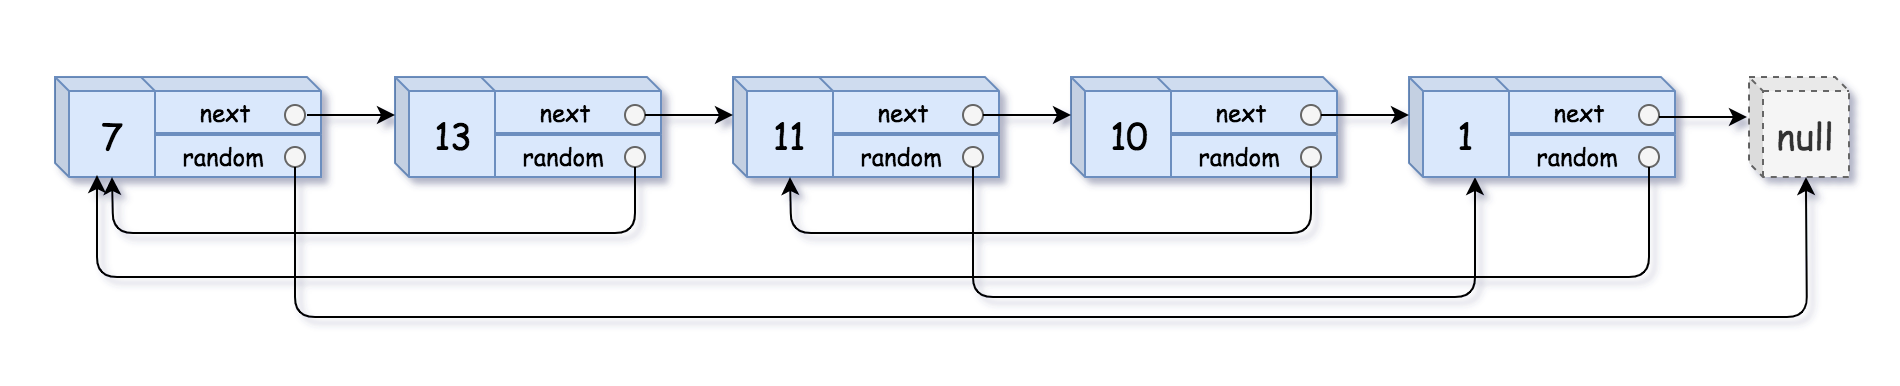

```
Input: head = [[7,null],[13,0],[11,4],[10,2],[1,0]]
Output: [[7,null],[13,0],[11,4],[10,2],[1,0]]
```
**Example 2:**

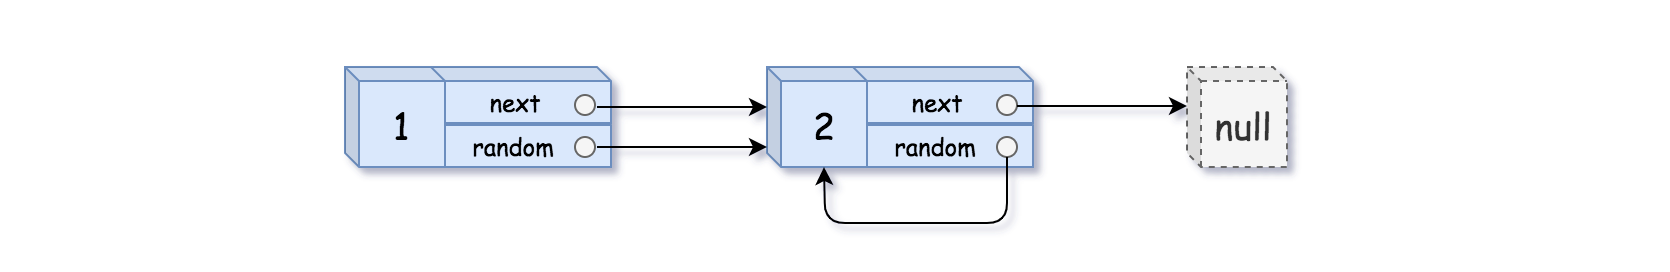

```
Input: head = [[1,1],[2,1]]
Output: [[1,1],[2,1]]
```
**Example 3:**

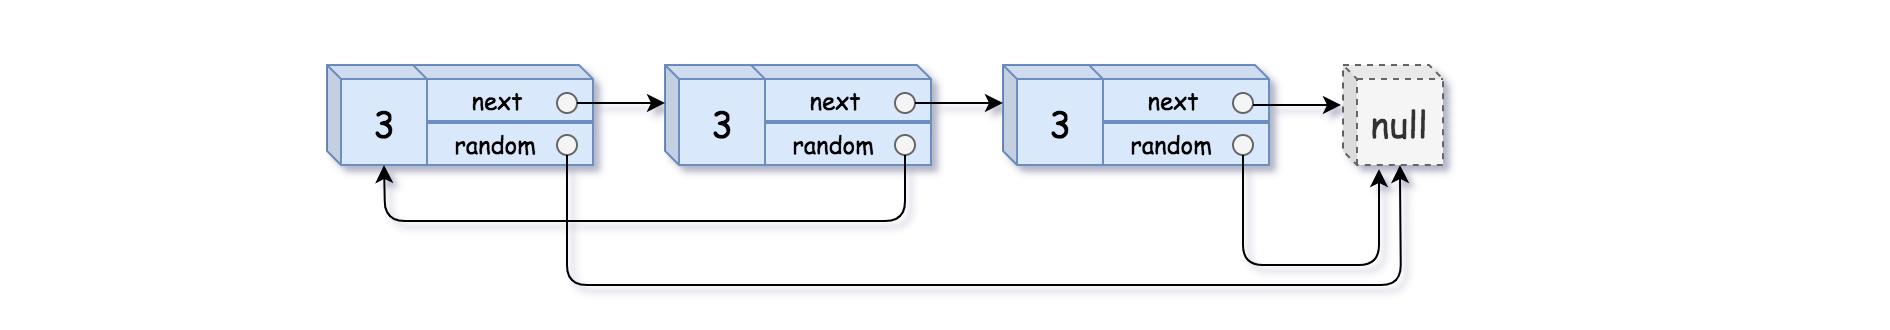

```
Input: head = [[3,null],[3,0],[3,null]]
Output: [[3,null],[3,0],[3,null]]
```

In [32]:
class Node():

  def __init__(self, data, next):
    self.data = data
    self.next = next

class LinkedList():

  def __init__(self):
    self.head = None
    
  def add(self, data):    
    if self.head is None:      
      self.head = Node(data, None)      
      return
       
    itr = self.head     

    while itr.next:        
      itr = itr.next

    itr.next = Node(data, None)
  
  def print(self):
  # If LL is empty 
    if self.head is None:
      print("Linked List is empty")
      return

    itr = self.head

    l_l_str = ""

    while itr:
      l_l_str += str(itr.data) + "--->"
      itr = itr.next

    print(l_l_str)

**Note**: We are using the input list. We cannot execute this completly as we don't have the original list.

In [37]:
class Solution():
  # Idea: We will need to take 2 passes at the linked list.
  # Pass 1: Simply copy the nodes of the list to a new list and also map the nodes of old to new list.
  # Pass 2: Leverage the map to link the nodes. Both next and random pointers.
  
  def deepCopyRandomLinkedList(self, ll: LinkedList) -> LinkedList:
    
    # None: handles the null condition
    oldToCopy = {None: None}

    # Pass 1
    cur = ll.head
    while cur:
      copy = Node(cur.val)
      oldToCopy[cur] = copy
      cur = cur.next

    # Pass 2
    cur = ll.head
    while cur:
      copy = oldToCopy[cur]
      copy.next = oldToCopy[cur.next]
      copy.next = oldToCopy[cur.random]
      cur = cur.next

    return oldToCopy[ll.head]